# EDA for RFV Database

In [1]:
import pandas as pd

csv_path = "/Users/elizabethkovalchuk/Documents/Network_Analytics/network_analytics_project/data/Rfv_database_export_1751899762.csv"

df = pd.read_csv(csv_path)

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nHead:\n", df.head())


Shape: (3126, 53)

Columns: ['Submitted by CCM', 'VID', 'Name of fishing vessel', 'Flag of fishing vessel', 'Registration number', 'WCPFC Identification Number (WIN)', 'Previous names (if known)', 'Port of registry', 'Name of the owner or owners', 'Address of the owner or owners', 'Name of the master', 'Nationality of the master', 'Previous flag (if any)', 'International Radio Call Sign', 'Vessel communication types and numbers', 'Colour photograph of the vessel (link)', 'Where the vessel was built', 'When the vessel was built', 'Type of vessel', 'Normal crew complement', 'Type of fishing method or methods', 'Length', 'Type of length', 'Unit of length', 'Moulded depth', 'Unit of depth', 'Beam', 'Unit of Beam', 'Gross registered tonnage (GRT) or gross tonnage (GT)', 'Type of tonnage', 'Power of main engine or engines', 'Unit of power of main engine or engines', 'Freezer type(s)', 'Freezing capacity', 'Units of freezing capacity', 'Number of freezer units', 'Fish hold capacity', 'Units o

## Potential Nodes 

| Node Type            | Columns of Interest                                   |
| -------------------- | ----------------------------------------------------- |
| **Vessel**           | VID, Name of fishing vessel, Registration number, IMO |
| **Owner**            | Name of the owner or owners, Address of owner         |
| **Master (Captain)** | Name of master, Nationality of master                 |
| **Port**             | Port of registry                                      |
| **Flag State**       | Flag of fishing vessel                                |
| **Charterer**        | Name of charterer, Address of charterer               |
| **Fishing Methods**  | Type of fishing method                                |
| **Authorization**    | Authorization number, Areas/species authorized        |


## Potential Edges 

| From Node | To Node        | Relationship Type   |
| --------- | -------------- | ------------------- |
| Vessel    | Owner          | “owned by”          |
| Vessel    | Flag State     | “flagged under”     |
| Vessel    | Port           | “registered in”     |
| Vessel    | Master         | “operated by”       |
| Vessel    | Charterer      | “chartered by”      |
| Vessel    | Fishing Method | “uses method”       |
| Vessel    | Authorization  | “has authorization” |
| Owner     | Address        | “located at”        |


### How many unique vessels exist? 

In [2]:
print(df['VID'].nunique())

3126


### How many unique owners? 

In [3]:
print(df['Name of the owner or owners'].nunique())
print(df['Name of the owner or owners'].value_counts().head(10))


1889
Name of the owner or owners
MARCHAEL SEA VENTURES CORPORATION                 47
CNFC OVERSEAS FISHERIES CO., LTD                  36
SAJO INDUSTRIES CO., LTD.                         29
PINGTAIRONG OCEAN FISHERY GROUP CO.,LTD.          27
NH AGRO INDUSTRIAL, INC.                          26
Bintang Mandiri Bersaudara, PT.                   25
TRANS-PACIFIC JOURNEY FISHING CORP.               23
DONGWON INDUSTRIES Co., Ltd                       20
LIANCHENG OVERSEAS FISHERY (SHENZHEN) CO., LTD    18
ZHOUSHAN RONGYOURONG OCEAN FISHERY CO.,LTD.       16
Name: count, dtype: int64


### How many vessels per owner? 

In [4]:
vessels_per_owner = df.groupby('Name of the owner or owners')['VID'].nunique().reset_index(name='vessel_count')
print(vessels_per_owner.sort_values('vessel_count', ascending=False).head(10))


                         Name of the owner or owners  vessel_count
990                MARCHAEL SEA VENTURES CORPORATION            47
249                 CNFC OVERSEAS FISHERIES CO., LTD            36
1235                       SAJO INDUSTRIES CO., LTD.            29
1160        PINGTAIRONG OCEAN FISHERY GROUP CO.,LTD.            27
1075                        NH AGRO INDUSTRIAL, INC.            26
68                   Bintang Mandiri Bersaudara, PT.            25
1557             TRANS-PACIFIC JOURNEY FISHING CORP.            23
312                      DONGWON INDUSTRIES Co., Ltd            20
889   LIANCHENG OVERSEAS FISHERY (SHENZHEN) CO., LTD            18
1204                RONGCHENG OCEAN FISHERY CO., LTD            16


### Vessel / Flag Relationships 

In [5]:
flag_counts = df['Flag of fishing vessel'].value_counts()
print(flag_counts.head(10))


Flag of fishing vessel
JP    548
CN    546
TW    536
PH    442
US    192
KR    180
ID    118
PA     95
PF     90
VU     61
Name: count, dtype: int64


### Unique Ports of Registry 

In [6]:
print(df['Port of registry'].nunique())
print(df['Port of registry'].value_counts().head(10))


212
Port of registry
TW-KHH    497
PH-GES    367
CN-ZOS    149
KR-PUS    143
US-HNL    140
PA-PTY     95
PF-PPT     90
CN-SHD     79
CN-SHK     74
PH-MNL     66
Name: count, dtype: int64


### Do vessels switch owners or names over time?

This could help with identity laundering, boats registering or switching owners and over-fishing per vessel / filings per individual. 

In [7]:
name_counts = df['Name of fishing vessel'].value_counts()
print(name_counts[name_counts > 1])


Name of fishing vessel
FUKUTOKU MARU NO.88    2
SHINYO MARU            2
TAIYO MARU NO.38       2
KOUEI MARU NO.8        2
WAKABA MARU NO.5       2
LIBRA                  2
TAIKEI MARU NO.1       2
CHOKYU MARU NO.8       2
SOHO MARU NO.16        2
WAKABA MARU NO.6       2
OCEAN ACE              2
CHOKYU MARU NO.11      2
Name: count, dtype: int64


### Missing values in network-defining columns

In [8]:
print(df['Name of the owner or owners'].isna().sum())



1


In [9]:
missing_owner_row = df[df['Name of the owner or owners'].isna()]
print(missing_owner_row)

    Submitted by CCM    VID Name of fishing vessel Flag of fishing vessel  \
656               US  12416               SEEKER 3                     US   

    Registration number WCPFC Identification Number (WIN)  \
656              582101                           WDN8081   

    Previous names (if known) Port of registry Name of the owner or owners  \
656               MARK DARREN           US-HNL                         NaN   

    Address of the owner or owners  ...  \
656                            NaN  ...   

    End of period of validity of authorization  \
656                                28-Feb-2029   

    Authorized to tranship on the high seas  \
656                                     Yes   

    Purse seine vessel authorized to tranship at sea Host CCM  \
656                                   NOT APPLICABLE      NaN   

    Name of charterer Address of charterer Start date of charter  \
656               NaN                  NaN                   NaN   

     Expiratio

Replacing this NA with an "Unknown Owner" as we are trying to detect anomalies. 

In [10]:
# Replace missing owners with dummy value
df['Name of the owner or owners'] = df['Name of the owner or owners'].fillna('Unknown Owner')
df['Address of the owner or owners'] = df['Address of the owner or owners'].fillna('Unknown Address')

# Check it worked
print(df['Name of the owner or owners'].isna().sum())


0


## Vessels as Nodes 

In [11]:
vessels = df[['VID', 'Name of fishing vessel', 'IMO or LR number']]
vessels['node_id'] = 'vessel_' + vessels['VID'].astype(str)
vessels['node_type'] = 'vessel'
vessels['label'] = vessels['Name of fishing vessel']
vessel_nodes = vessels[['node_id', 'node_type', 'label']]


/var/folders/0t/txmdz9bs23b528hfd3hh8grh0000gn/T/ipykernel_73563/3050131202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessels['node_id'] = 'vessel_' + vessels['VID'].astype(str)
/var/folders/0t/txmdz9bs23b528hfd3hh8grh0000gn/T/ipykernel_73563/3050131202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vessels['node_type'] = 'vessel'
/var/folders/0t/txmdz9bs23b528hfd3hh8grh0000gn/T/ipykernel_73563/3050131202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

### Treating Vessels as Nodes 

In [12]:
# Create vessel nodes
vessel_nodes = df[['VID', 'Name of fishing vessel',
                   'Flag of fishing vessel', 'IMO or LR number']].copy()

vessel_nodes['node_id'] = 'vessel_' + vessel_nodes['VID'].astype(str)
vessel_nodes['node_type'] = 'vessel'
vessel_nodes.rename(columns={
    'Name of fishing vessel': 'name',
    'Flag of fishing vessel': 'flag',
    'IMO or LR number': 'imo'
}, inplace=True)

vessel_nodes = vessel_nodes[['node_id', 'node_type', 'name', 'flag', 'imo']]

print(vessel_nodes.head())


        node_id node_type             name flag        imo
0  vessel_12098    vessel       OCEAN STAR   PA  9915686.0
1  vessel_10572    vessel        MONTELAPE   SV  8021775.0
2   vessel_4655    vessel       MONTELUCIA   SV  9232668.0
3   vessel_4656    vessel       MONTEROCIO   SV  8919453.0
4   vessel_9975    vessel  CHANG YI NO.368   TW  8748804.0


### Owner Nodes 

In [13]:
# Extract unique owners
owners = df[['Name of the owner or owners']].drop_duplicates().copy()
owners['node_id'] = 'owner_' + owners['Name of the owner or owners'].astype(str)
owners['node_type'] = 'owner'
owners.rename(columns={'Name of the owner or owners': 'name'}, inplace=True)

owner_nodes = owners[['node_id', 'node_type', 'name']]

print(owner_nodes.head())


                                             node_id node_type  \
0                       owner_MED BFT VESSEL LIMITED     owner   
1  owner_Oakcity Tuna Fishing Corporation, S.A. d...     owner   
2  owner_OAKCITY TUNA FISHING CORPORATION S.A de ...     owner   
4                owner_HAI CHAN YANG FISHERY CO.,LTD     owner   
5                                    owner_KOCHI KEN     owner   

                                             name  
0                          MED BFT VESSEL LIMITED  
1  Oakcity Tuna Fishing Corporation, S.A. de C.V.  
2    OAKCITY TUNA FISHING CORPORATION S.A de C.V.  
4                   HAI CHAN YANG FISHERY CO.,LTD  
5                                       KOCHI KEN  


### Create Edges between Vessels and Owners 

In [14]:
# Create edges between vessels and owners
edges_vessel_owner = df[['VID', 'Name of the owner or owners']].copy()

edges_vessel_owner['source'] = 'vessel_' + edges_vessel_owner['VID'].astype(str)
edges_vessel_owner['target'] = 'owner_' + edges_vessel_owner['Name of the owner or owners'].astype(str)
edges_vessel_owner['relationship'] = 'owned_by'

edges_vessel_owner = edges_vessel_owner[['source', 'target', 'relationship']]

print(edges_vessel_owner.head())


         source                                             target  \
0  vessel_12098                       owner_MED BFT VESSEL LIMITED   
1  vessel_10572  owner_Oakcity Tuna Fishing Corporation, S.A. d...   
2   vessel_4655  owner_OAKCITY TUNA FISHING CORPORATION S.A de ...   
3   vessel_4656  owner_OAKCITY TUNA FISHING CORPORATION S.A de ...   
4   vessel_9975                owner_HAI CHAN YANG FISHERY CO.,LTD   

  relationship  
0     owned_by  
1     owned_by  
2     owned_by  
3     owned_by  
4     owned_by  


Saving Data for Reuse: 

In [16]:
vessel_nodes.to_csv('../data/vessel_nodes.csv', index=False)
owner_nodes.to_csv('../data/owner_nodes.csv', index=False)
edges_vessel_owner.to_csv('../data/edges_vessel_owner.csv', index=False)


### Build NetworkX Graph 

In [ ]:
import networkx as nx

# Initialize graph
G = nx.DiGraph()

# Add vessel nodes
for _, row in vessel_nodes.iterrows():
    G.add_node(row['node_id'], node_type=row['node_type'],
               name=row['name'], flag=row['flag'], imo=row['imo'])

# Add owner nodes
for _, row in owner_nodes.iterrows():
    G.add_node(row['node_id'], node_type=row['node_type'],
               name=row['name'])

# Add edges
for _, row in edges_vessel_owner.iterrows():
    G.add_edge(row['source'], row['target'], relationship=row['relationship'])

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph has 5016 nodes and 3126 edges.


#### Visualization

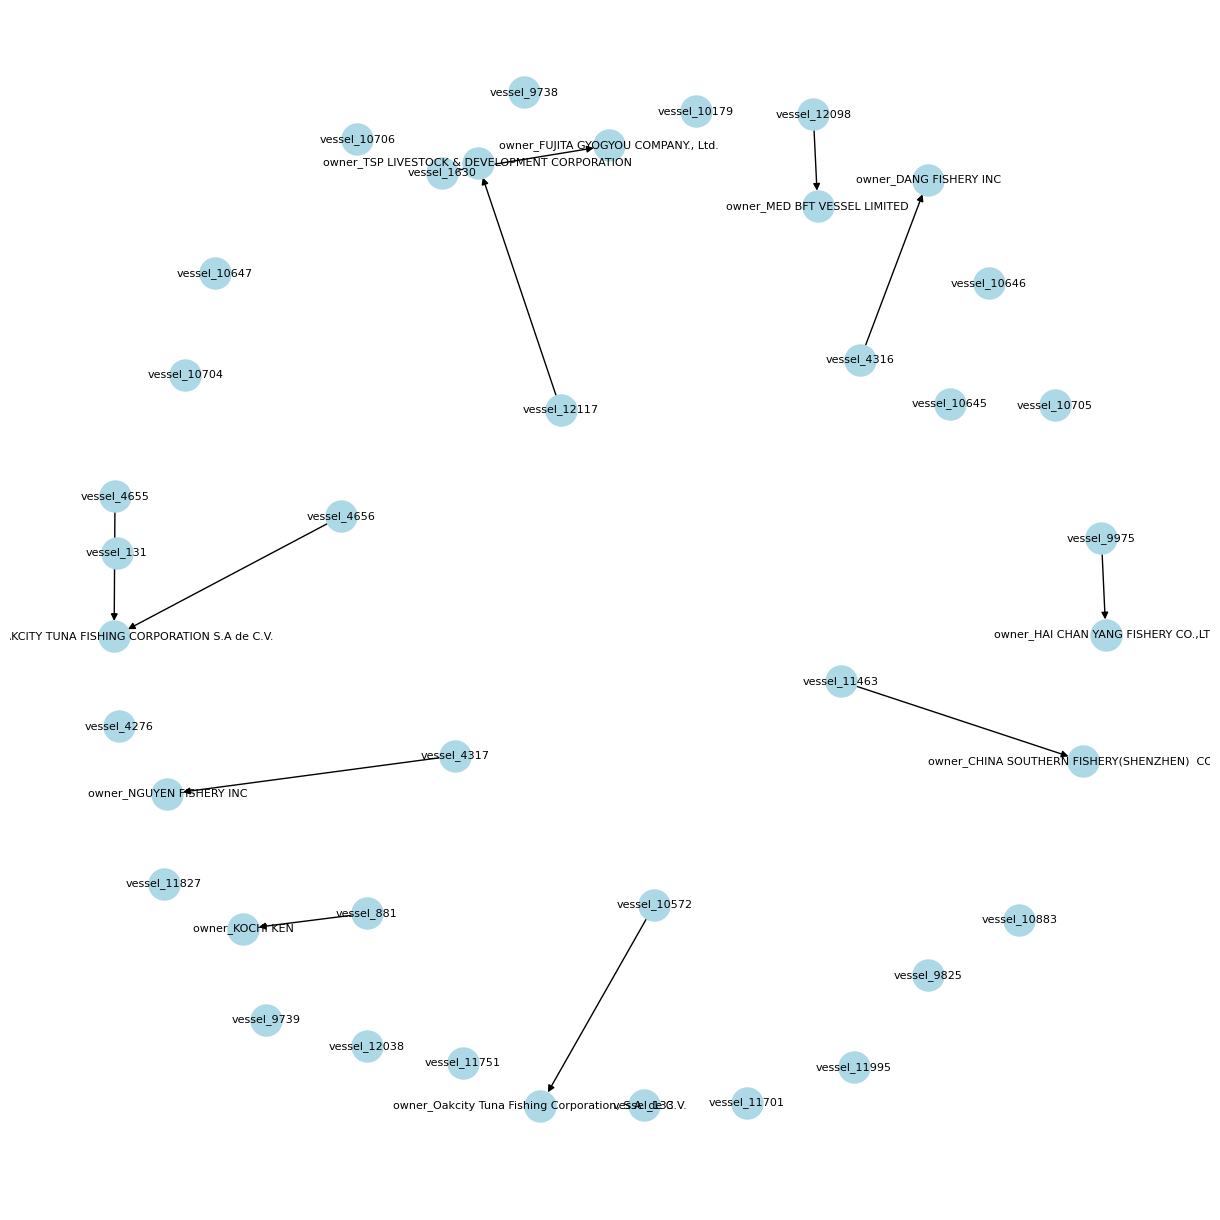

In [19]:
import matplotlib.pyplot as plt

# Small subgraph for plotting
small_nodes = list(vessel_nodes['node_id'].head(30)) + \
              list(edges_vessel_owner['target'].unique()[:10])

H = G.subgraph(small_nodes)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(H, k=0.5)
nx.draw(H, pos, with_labels=True,
        node_size=500,
        node_color='lightblue',
        font_size=8)
plt.show()
